In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [2]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [3]:
path = '../data/2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

**1. Find top-10 carriers in terms of the number of completed flights (UniqueCarrier column)?
Which of the listed below is not in your top-10 list?**

In [4]:
flights_df.UniqueCarrier.value_counts().head(10)

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: UniqueCarrier, dtype: int64

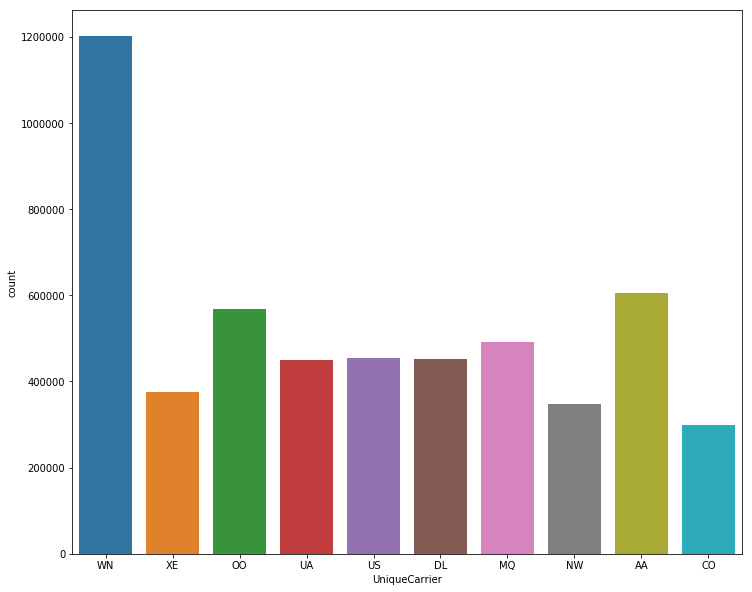

In [10]:
sns.countplot(flights_df[flights_df['UniqueCarrier'].\
                 isin(flights_df['UniqueCarrier'].value_counts().head(10).index)]['UniqueCarrier']);

**Answer(1):EV**

**2. Plot distributions of flight cancellation reasons (CancellationCode).**

In [6]:
cancelled_flights_df = flights_df[flights_df['Cancelled']==1]

In [7]:
cancelled_flights_df.CancellationCode.value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

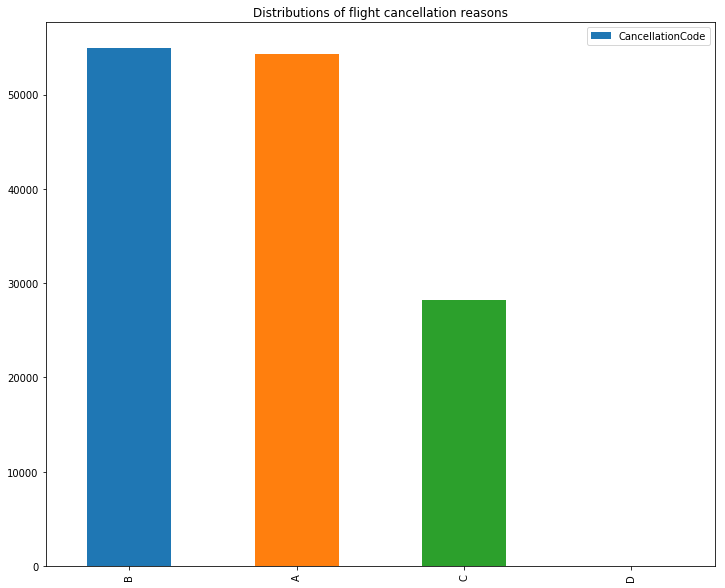

In [11]:
cancelled_flights_df.CancellationCode.value_counts().plot(kind='bar',label='CancellationCode');
plt.legend()
plt.title('Distributions of flight cancellation reasons');

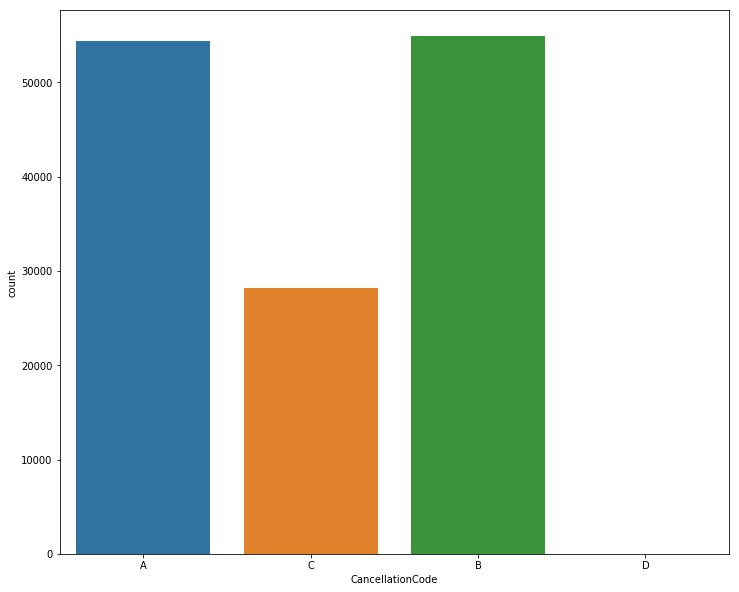

In [12]:
sns.countplot(x='CancellationCode',data=cancelled_flights_df);

**Answer(2): B == weather conditions**

**3. Which route is the most frequent, in terms of the number of flights?**

In [146]:
flights_df.groupby(['Origin','Dest'])['Origin'].count().sort_values(ascending=False).head(1)

Origin  Dest
SFO     LAX     13788
Name: Origin, dtype: int64

**Answer(3): San-Francisco – Los-Angeles**

**4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

In [144]:
delay_flights_df = flights_df [(flights_df['DepDelay']>0)]
delay_flights_df['WeatherDelay1'] = (delay_flights_df['WeatherDelay']>0).astype('int64')
#delay_flights_df.head(10)

In [8]:
#count_delay_df = delay_flights_df.groupby(['Origin','Dest','WeatherDelay1'])[['Origin','WeatherDelay']].\
#            count().sort_values(by='Origin',ascending=False).\
#            head(5).rename(columns={'Origin': 'count'})

In [12]:
count1_delay_df = delay_flights_df.groupby(['Origin','Dest'])\
        .agg({'Origin':'count',
        'WeatherDelay1': np.sum})\
        .sort_values('Origin', ascending=False)\
        .iloc[0:5]
count1_delay_df

,,Origin,WeatherDelay1
Origin,Dest,,
LAX,SFO,6253,109
DAL,HOU,5742,133
SFO,LAX,5322,31
ORD,LGA,5311,266
HOU,DAL,5288,129


In [14]:
count1_delay_df['WeatherDelay1'].sum()

668

**Answer(4):668**

**5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

In [13]:
#delay_flights_df[(delay_flights_df['Origin']=='SFO')&(delay_flights_df['Dest']=='LAX')]

In [4]:
#flights_df['DepTime']

In [13]:
flights_df['DepTime1'] = flights_df['DepTime']

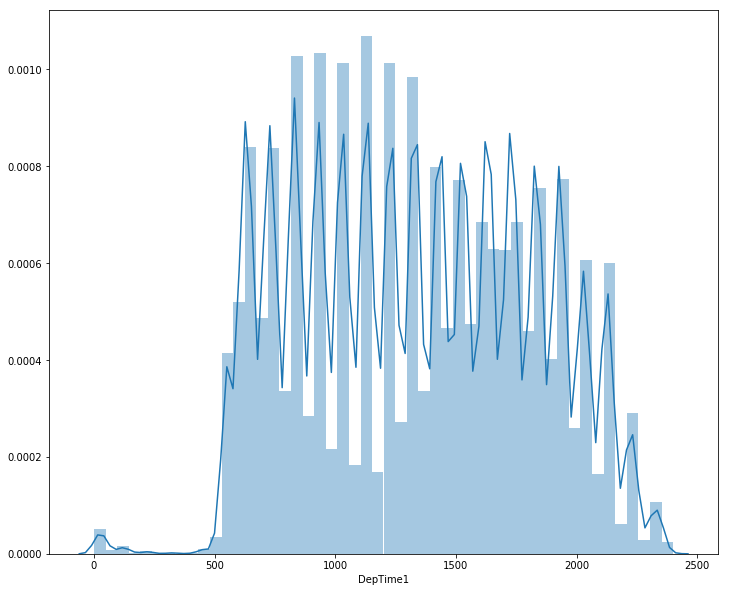

In [14]:
sns.distplot(flights_df.DepTime1.dropna());

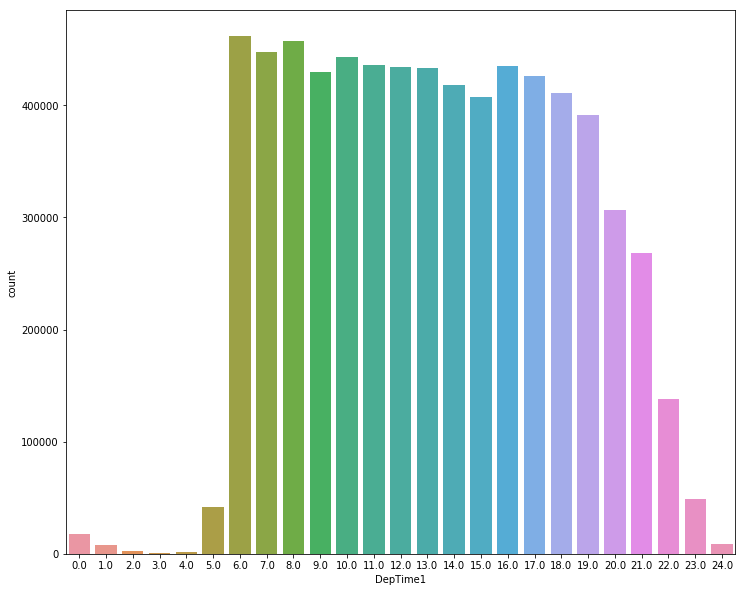

In [10]:
sns.countplot(round(flights_df['DepTime1'].dropna()/100));

In [16]:
depT = flights_df.groupby('DepTime1').size()

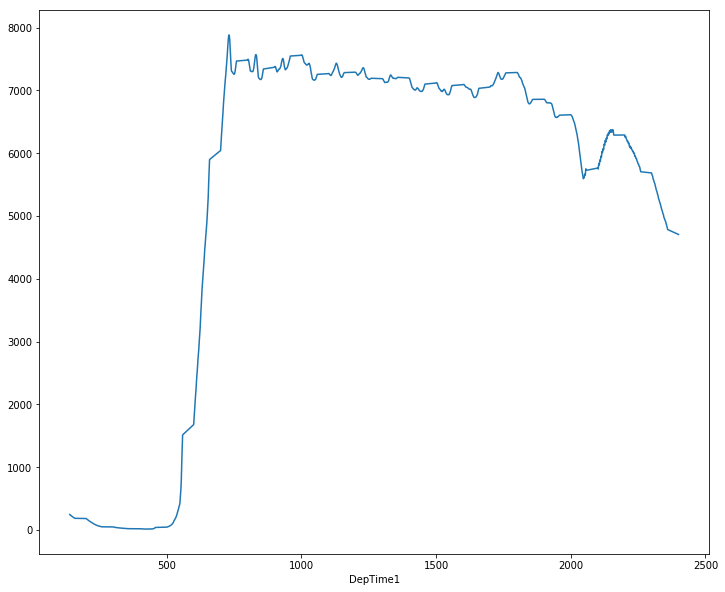

In [18]:
depT.rolling(window=100).mean().plot();

**Answer(5):                                                                                   
-In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.**

**6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

In [76]:
ff = flights_df.groupby(['Month','DayofMonth','DayOfWeek'])[['DayofMonth']].\
                    count().rename(columns={'DayofMonth': 'count'}).reset_index()
ff.head(10)

,Month,DayofMonth,DayOfWeek,count
0,1,1,2,19187
1,1,2,3,20954
2,1,3,4,20937
3,1,4,5,20929
4,1,5,6,18069
5,1,6,7,19897
6,1,7,1,20347
7,1,8,2,19604
8,1,9,3,19820
9,1,10,4,20305


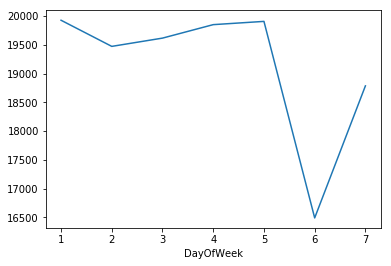

In [82]:
ff.groupby('DayOfWeek')['count'].mean().plot();

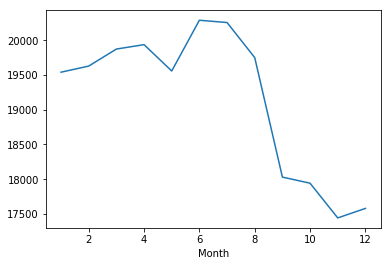

In [81]:
ff.groupby('Month')['count'].mean().plot();

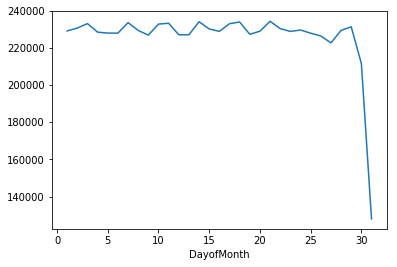

In [31]:
flights_df.groupby('DayofMonth').size().plot();

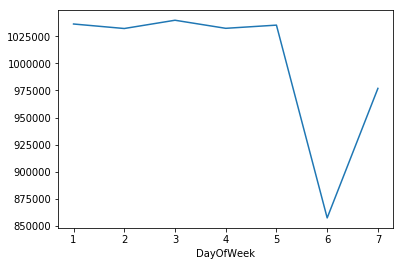

In [32]:
flights_df.groupby('DayOfWeek').size().plot();

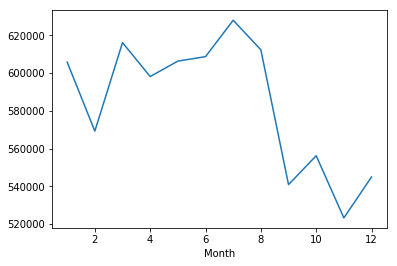

In [33]:
flights_df.groupby('Month').size().plot();

**Answer(6):                                                                
-The number of flights during weekends is less than during weekdays (working days).                                 
-There are less flights during winter than during summer.**

**7.Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

In [19]:
fa = flights_df.groupby(['Month','CancellationCode'])[['Month']]\
            .count().rename(columns={'Month': 'count'}).reset_index()

In [148]:
fa.head(10)

,Month,CancellationCode,count
0,1,A,6635
1,1,B,6711
2,1,C,3962
3,2,A,6090
4,2,B,10034
5,2,C,4470
6,2,D,2
7,3,A,6038
8,3,B,7520
9,3,C,2621


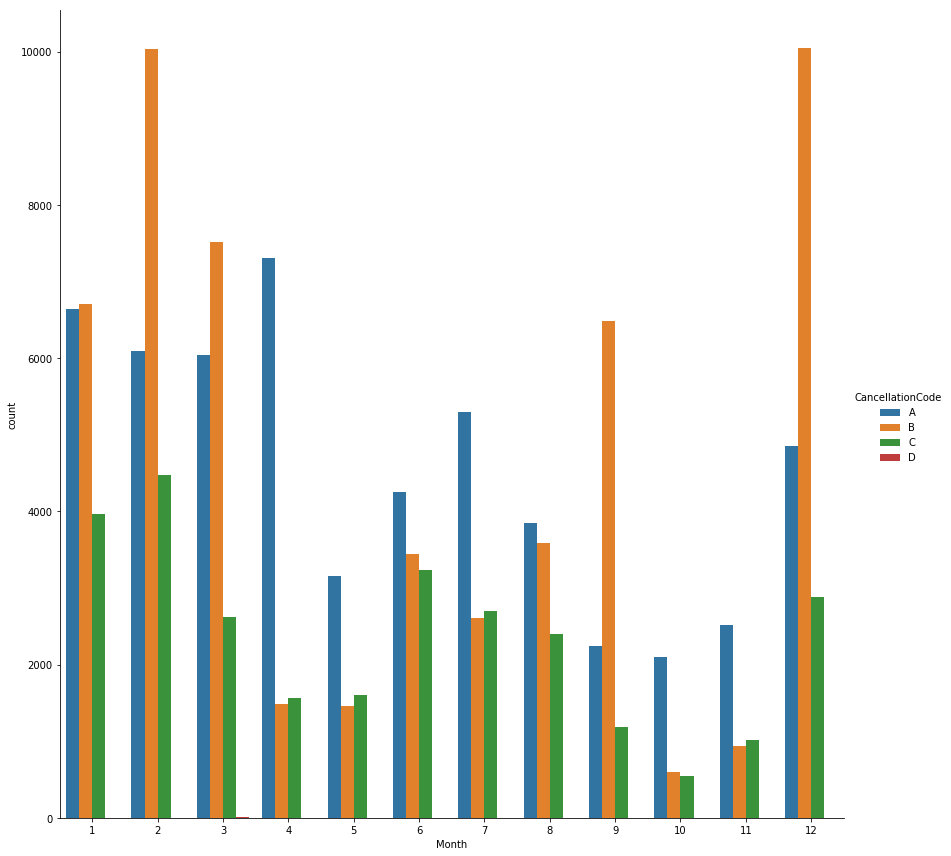

In [22]:
sns.factorplot(x='Month', y='count', hue='CancellationCode', 
               data=fa, kind='bar', size=12);

**Answer(7):                                                                
-December has the highest rate of cancellations due to weather.                                                                            
-April's top cancellation reason is carriers.**

**8. Which month has the greatest number of cancellations due to Carrier?**

**Answer(8): April**

**9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

In [92]:
april_carrier = flights_df[(flights_df['Month']==4)&(flights_df['CancellationCode']=='A')]

In [149]:
april_carrier['UniqueCarrier'].value_counts().head(1)

AA    3696
Name: UniqueCarrier, dtype: int64

In [99]:
flights_df[(flights_df['CancellationCode']=='A')&(flights_df['UniqueCarrier']=='AA')]['Month'].value_counts()

4     3696
3      989
1      814
2      735
8      707
5      593
7      492
12     397
6      354
9      331
11     262
10     239
Name: Month, dtype: int64

**Answer(9): AA**

**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures?**

In [13]:
non_negative_delay = flights_df[(flights_df['ArrDelay']>=0)&(flights_df['DepDelay']>=0)]

In [17]:
med_Arr_Dep = non_negative_delay.groupby('UniqueCarrier')[['ArrDelay']].median()\
                .join(non_negative_delay.groupby('UniqueCarrier')[['DepDelay']].median()).reset_index()

In [18]:
med_Arr_Dep.sort_values(by='ArrDelay').head()

,UniqueCarrier,ArrDelay,DepDelay
2,AQ,6.0,5.0
10,HA,9.0,7.0
17,WN,14.0,15.0
8,F9,14.0,12.0
3,AS,18.0,16.0


In [19]:
med_Arr_Dep 

,UniqueCarrier,ArrDelay,DepDelay
0,9E,23.0,21.0
1,AA,25.0,22.0
2,AQ,6.0,5.0
3,AS,18.0,16.0
4,B6,31.0,28.0
5,CO,19.0,17.0
6,DL,19.0,15.0
7,EV,23.0,21.0
8,F9,14.0,12.0
9,FL,20.0,17.0


In [14]:
ArrQuant = non_negative_delay['ArrDelay'].quantile(.95)
DepQuant = non_negative_delay['ArrDelay'].quantile(.95)
filteredDf = non_negative_delay[(non_negative_delay['ArrDelay'].between(0, ArrQuant) &
                         (non_negative_delay['DepDelay'].between(0, DepQuant)))]\
                            [['UniqueCarrier', 'ArrDelay', 'DepDelay']]

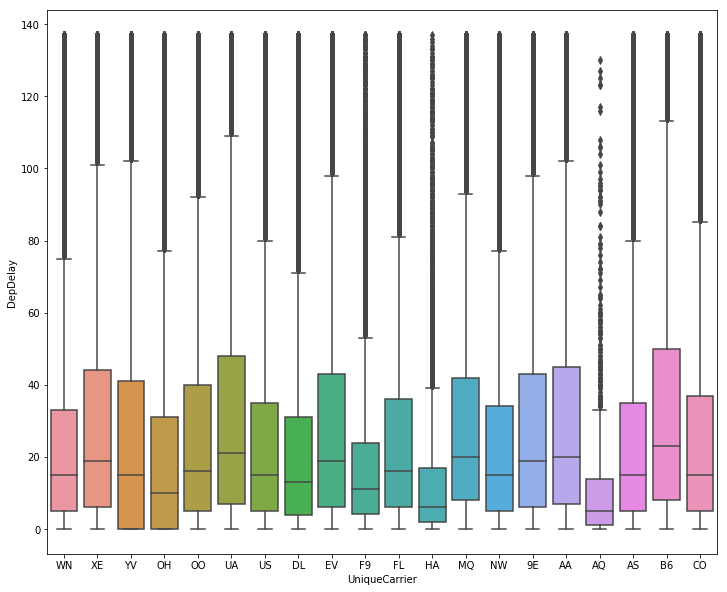

In [16]:
sns.boxplot(x ='UniqueCarrier', y = 'DepDelay' , data =filteredDf );

In [11]:
ArrQuant1 = flights_df['ArrDelay'].quantile(.95)
DepQuant1 = flights_df['ArrDelay'].quantile(.95)
filteredDf1 = flights_df[(flights_df['ArrDelay'].between(0, ArrQuant1) &
                         (flights_df['DepDelay'].between(0, DepQuant1)))][['UniqueCarrier', 'ArrDelay', 'DepDelay']]

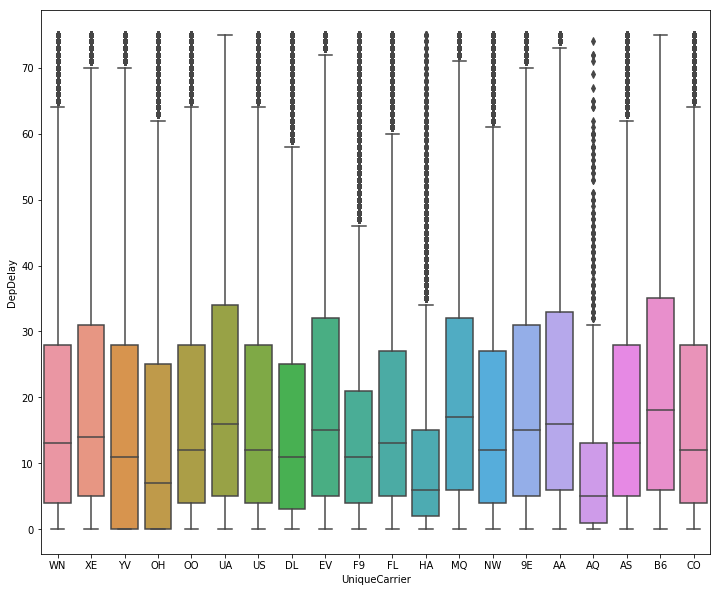

In [12]:
sns.boxplot(x ='UniqueCarrier', y = 'DepDelay' , data =filteredDf1 );

**Answer(10): AQ**

In [121]:
#pd.DataFrame(non_negative_delay.groupby('UniqueCarrier')['DepDelay'].median())

In [150]:
#sns.boxplot(y='ArrDelay',x='UniqueCarrier',data = med_Arr_Dep);

In [151]:
#sns.boxplot(y='DepDelay',x='UniqueCarrier',data = med_Arr_Dep);